In [53]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import PercentFormatter, FixedFormatter, FixedLocator

In [2]:
plt.rc("savefig", bbox="tight")
plt.rc("xtick", direction="in")
plt.rc("ytick", direction="in")
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": "\\usepackage{tgpagella}",
    "font.family": "serif",
    # "font.serif": "Palatino",
})

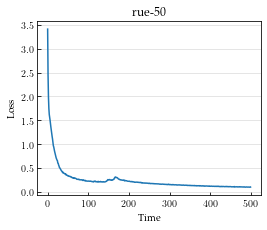

In [15]:
a = np.loadtxt("rue50_log.txt")
a[:, 0] -= a[0, 0]
a[:, 1] = -a[:, 1]

fig, ax = plt.subplots(figsize=(4, 3.2))
ax.plot(range(500), a[:, 1][:500])
ax.set_title("rue-50")
ax.set_xlabel("Time")
ax.set_ylabel("Loss")
ax.grid(axis="y", alpha=0.4)
fig.savefig("curve-rue50-first500.pdf", dpi=200)

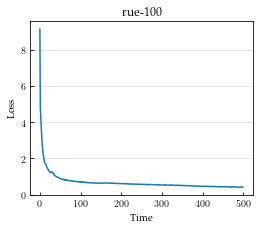

In [16]:
a = np.loadtxt("rue100_log.txt")
a[:, 0] -= a[0, 0]
a[:, 1] = -a[:, 1]

fig, ax = plt.subplots(figsize=(4, 3.2))
# ax.plot(a[:, 0], a[:, 1])
ax.plot(range(500), a[:, 1][:500])
ax.set_title("rue-100")
ax.set_xlabel("Time")
ax.set_ylabel("Loss")
ax.grid(axis="y", alpha=0.4)
fig.savefig("curve-rue100-first500.pdf", dpi=200)

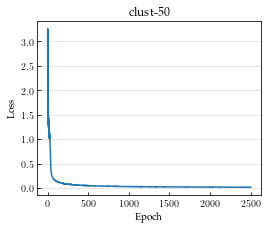

In [21]:
a = np.loadtxt("clust50_log.txt")
a[:, 0] -= a[0, 0]
a[:, 1] = -a[:, 1]

fig, ax = plt.subplots(figsize=(4, 3.2))
ax.plot(range(2500), a[:, 1][:2500])
ax.set_title("clust-50")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.grid(axis="y", alpha=0.4)
fig.savefig("curve-clust50-first2500.pdf", dpi=200)

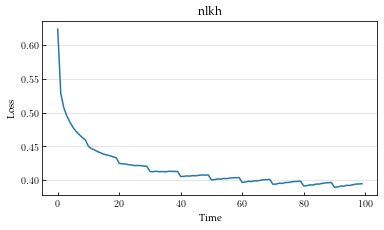

In [23]:
a = np.loadtxt("nlkh_log.txt")
a[:, 0] -= a[0, 0]
# a[:, 1] = -a[:, 1]

fig, ax = plt.subplots(figsize=(6, 3.2))
# ax.plot(a[:, 0], a[:, 1])
ax.plot(range(100), a[:, 1][:100])
ax.set_title("nlkh")
ax.set_xlabel("Time")
ax.set_ylabel("Loss")
ax.grid(axis="y", alpha=0.4)
fig.savefig("curve-nlkh-first100.pdf", dpi=200)

In [25]:
import pandas as pd

In [85]:
df_rue50 = pd.read_csv("rue50.csv")
df_rue100 = pd.read_csv("rue100.csv")
df_clust50 = pd.read_csv("clust50.csv")
df_clust100 = pd.read_csv("clust100.csv")

max_epoch = 2500

In [86]:
walltime_rue50 = df_rue50["Wall time"][:max_epoch].to_numpy()
walltime_rue50 -= walltime_rue50[0]
walltime_rue100 = df_rue100["Wall time"][:max_epoch].to_numpy()
walltime_rue100 -= walltime_rue100[0]
walltime_clust50 = df_clust50["Wall time"][:max_epoch].to_numpy()
walltime_clust50 -= walltime_clust50[0]
walltime_clust100 = df_clust100["Wall time"][:max_epoch].to_numpy()
walltime_clust100 -= walltime_clust100[0]

In [92]:
print("rue50")
print((walltime_rue50 < 3600 * 5).sum())
print((walltime_rue50 < 3600 * 10).sum())

print("\nrue100")
print((walltime_rue100 < 3600 * 5).sum())
print((walltime_rue100 < 3600 * 10).sum())
print((walltime_rue100 < 3600 * 15).sum())
print((walltime_rue100 < 3600 * 20).sum())

points_rue50 = [1156, 2320]
points_rue100 = [567, 1134, 1698, 2267]

points_rue50_expanded = list(map(lambda x: x * 4 if x < 500 else x + 1500, points_rue50))
points_rue100_expanded = list(map(lambda x: x * 4 if x < 500 else x + 1500, points_rue100))

rue50
1156
2320

rue100
567
1134
1698
2267


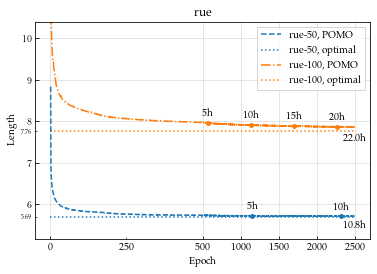

In [125]:
rue50x = df_rue50["Step"][:max_epoch].to_numpy()
rue50y = df_rue50["Value"][:max_epoch].to_numpy()
rue100x = df_rue100["Step"][:max_epoch].to_numpy()
rue100y = df_rue100["Value"][:max_epoch].to_numpy()

rue50x = list(rue50x[:500] * 4) + list(rue50x[500:] + 500 * 3)
rue100x = list(rue100x[:500] * 4) + list(rue100x[500:] + 500 * 3)

plt.plot(rue50x, rue50y, linestyle="dashed", label="rue-50, POMO")
plt.plot(rue100x, rue100y, linestyle="dashdot", label="rue-100, POMO")
plt.hlines(5.69, 0, 4000, linestyles="dotted", colors="C0", label="rue-50, optimal")
plt.hlines(7.76, 0, 4000, linestyles="dotted", colors="C1", label="rue-100, optimal")
plt.xlabel("Epoch")
plt.xticks([0, 2000, 2500, 3000, 3500, 4000], ["0", "500", "1000", "1500", "2000", "2500"])
plt.gca().xaxis.set_minor_locator(FixedLocator([1000]))
plt.gca().xaxis.set_minor_formatter(FixedFormatter(["250"]))
plt.gca().yaxis.set_minor_locator(FixedLocator([5.69, 7.76]))
plt.gca().yaxis.set_minor_formatter(FixedFormatter(["5.69", "7.76"]))
plt.gca().tick_params(axis='y', which='minor', labelsize=6)
plt.ylabel("Length")
plt.ylim(top=10.4)
plt.title("rue")
plt.grid(alpha=0.4)

plt.scatter(points_rue50_expanded, rue50y[points_rue50], s=15)
plt.scatter(points_rue100_expanded, rue100y[points_rue100], s=15)
plt.text(points_rue50_expanded[0], rue50y[points_rue50][0] + 0.1, "5h", va="bottom", ha="center")
plt.text(points_rue50_expanded[1], rue50y[points_rue50][1] + 0.1, "10h", va="bottom", ha="center")
plt.text(4000, rue50y[2499] - 0.11, f"{walltime_rue50[2499] / 3600:.1f}h", va="top", ha="center")
plt.text(points_rue100_expanded[0], rue100y[points_rue100][0] + 0.1, "5h", va="bottom", ha="center")
plt.text(points_rue100_expanded[1], rue100y[points_rue100][1] + 0.1, "10h", va="bottom", ha="center")
plt.text(points_rue100_expanded[2], rue100y[points_rue100][2] + 0.1, "15h", va="bottom", ha="center")
plt.text(points_rue100_expanded[3], rue100y[points_rue100][3] + 0.1, "20h", va="bottom", ha="center")
plt.text(4000, rue100y[2499] - 0.16, f"{walltime_rue100[2499] / 3600:.1f}h", va="top", ha="center")

handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 2, 1, 3]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

plt.savefig("rue-curves.pdf", dpi=200)

In [126]:
print("clust50")
print((walltime_clust50 < 3600 * 5).sum())
print((walltime_clust50 < 3600 * 10).sum())

print("\nclust100")
print((walltime_clust100 < 3600 * 5).sum())
print((walltime_clust100 < 3600 * 10).sum())
print((walltime_clust100 < 3600 * 15).sum())
print((walltime_clust100 < 3600 * 20).sum())

points_clust50 = [1156, 2316]
points_clust100 = [567, 1135, 1703, 2271]

points_clust50_expanded = list(map(lambda x: x * 4 if x < 500 else x + 1500, points_clust50))
points_clust100_expanded = list(map(lambda x: x * 4 if x < 500 else x + 1500, points_clust100))

clust50
1156
2316

clust100
567
1135
1703
2271


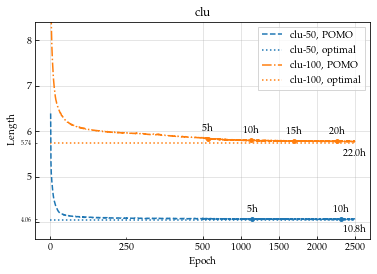

In [128]:
clust50x = df_clust50["Step"][:max_epoch].to_numpy()
clust50y = df_clust50["Value"][:max_epoch].to_numpy()
clust100x = df_clust100["Step"][:max_epoch].to_numpy()
clust100y = df_clust100["Value"][:max_epoch].to_numpy()

clust50x = list(clust50x[:500] * 4) + list(clust50x[500:] + 500 * 3)
clust100x = list(clust100x[:500] * 4) + list(clust100x[500:] + 500 * 3)

plt.plot(clust50x, clust50y, linestyle="dashed", label="clu-50, POMO")
plt.plot(clust100x, clust100y, linestyle="dashdot", label="clu-100, POMO")
plt.hlines(4.0574, 0, 4000, linestyles="dotted", colors="C0", label="clu-50, optimal")
plt.hlines(5.7358, 0, 4000, linestyles="dotted", colors="C1", label="clu-100, optimal")
plt.xlabel("Epoch")
plt.xticks([0, 2000, 2500, 3000, 3500, 4000], ["0", "500", "1000", "1500", "2000", "2500"])
plt.yticks([4, 5, 6, 7, 8], ["", "5", "6", "7", "8"])
plt.gca().xaxis.set_minor_locator(FixedLocator([1000]))
plt.gca().xaxis.set_minor_formatter(FixedFormatter(["250"]))
plt.gca().yaxis.set_minor_locator(FixedLocator([4.06, 5.74]))
plt.gca().yaxis.set_minor_formatter(FixedFormatter(["4.06", "5.74"]))
plt.gca().tick_params(axis='y', which='minor', labelsize=6)
plt.ylabel("Length")
plt.ylim(top=8.4)
plt.title("clu")
plt.grid(alpha=0.4)

plt.scatter(points_clust50_expanded, clust50y[points_clust50], s=15)
plt.scatter(points_clust100_expanded, clust100y[points_clust100], s=15)
plt.text(points_clust50_expanded[0], clust50y[points_clust50][0] + 0.1, "5h", va="bottom", ha="center")
plt.text(points_clust50_expanded[1], clust50y[points_clust50][1] + 0.1, "10h", va="bottom", ha="center")
plt.text(4000, clust50y[2499] - 0.11, f"{walltime_clust50[2499] / 3600:.1f}h", va="top", ha="center")
plt.text(points_clust100_expanded[0], clust100y[points_clust100][0] + 0.1, "5h", va="bottom", ha="center")
plt.text(points_clust100_expanded[1], clust100y[points_clust100][1] + 0.1, "10h", va="bottom", ha="center")
plt.text(points_clust100_expanded[2], clust100y[points_clust100][2] + 0.1, "15h", va="bottom", ha="center")
plt.text(points_clust100_expanded[3], clust100y[points_clust100][3] + 0.1, "20h", va="bottom", ha="center")
plt.text(4000, clust100y[2499] - 0.16, f"{walltime_clust100[2499] / 3600:.1f}h", va="top", ha="center")

handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 2, 1, 3]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

plt.savefig("clu-curves.pdf", dpi=200)

## Original Manuscript

In [3]:
with open("data_table1.pkl", "rb") as rb:
    data_table1 = pickle.load(rb)
with open("data_table2_rue.pkl", "rb") as rb:
    data_table2_rue = pickle.load(rb)
with open("data_table2_clust.pkl", "rb") as rb:
    data_table2_clust = pickle.load(rb)
with open("data_table3_n100.pkl", "rb") as rb:
    data_table3_n100 = pickle.load(rb)
with open("data_table3_n1000.pkl", "rb") as rb:
    data_table3_n1000 = pickle.load(rb)
# with open("data_table4.pkl", "rb") as rb:
#     data_table4 = pickle.load(rb)

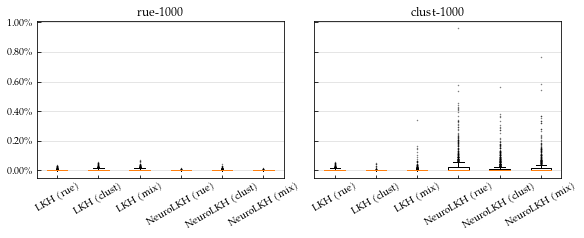

In [46]:
flierprops = dict(marker='.', markerfacecolor='black', markeredgecolor='none', markersize=3, alpha=0.5)

data_collection = data_table3_n1000
num_data_dist = len(data_collection.keys())
fig, axes = plt.subplots(1, num_data_dist, sharey=True, figsize=(4 * num_data_dist, 3.2), constrained_layout=True, gridspec_kw={"wspace": 0.04})
for ax, (dataset_id, data) in zip(axes.flatten(), data_collection.items()):
    ax.boxplot(data.values(), flierprops=flierprops)
    ax.set_xticklabels(data.keys(), rotation=30)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.set_title(dataset_id)
    ax.grid(axis="y", alpha=0.4)
    # ax.set_ylim(ymin=-0.0002, ymax=0.0042)
# fig.suptitle("Performance")
fig.savefig("fig3_n1000.pdf", dpi=200)

In [10]:
data_table2_rue['rue-500'].keys()

dict_keys(['NeuroLKH', 'LKH', 'LKH tuned', 'EAX'])

In [59]:
line_data_pomo = [data_table1["rue-50"]["POMO"], data_table1["rue-100"]["POMO"]]
line_data_pomox8 = [data_table1["rue-50"]["POMO x8"], data_table1["rue-100"]["POMO x8"]]
line_data_dact = [data_table1["rue-50"]["DACT"], data_table1["rue-100"]["DACT"]]
line_data_dactx4 = [data_table1["rue-50"]["DACT x4"]]
line_data_nlkh = [data_table1["rue-50"]["NeuroLKH"], data_table1["rue-100"]["NeuroLKH"], data_table2_rue["rue-500"]["NeuroLKH"], data_table2_rue["rue-1000"]["NeuroLKH"]]
line_data_lkh = [data_table1["rue-50"]["LKH"], data_table1["rue-100"]["LKH"], data_table2_rue["rue-500"]["LKH"], data_table2_rue["rue-1000"]["LKH"]]
line_data_lkh_tuned = [data_table2_rue["rue-500"]["LKH tuned"], data_table2_rue["rue-1000"]["LKH tuned"]]
line_data_eax = [data_table1["rue-50"]["EAX"], data_table1["rue-100"]["EAX"], data_table2_rue["rue-500"]["EAX"], data_table2_rue["rue-1000"]["EAX"]]
# NOTE std information is not kept in above data

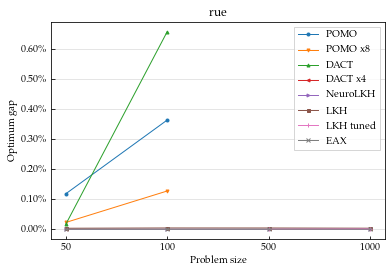

In [60]:
plt.close("all")
fig, ax = plt.subplots()
ax.plot([0, 1], [e.mean() for e in line_data_pomo], label="POMO", marker='.', linewidth=1)
ax.plot([0, 1], [e.mean() for e in line_data_pomox8], label="POMO x8", marker='v', linewidth=1, markersize=3)
ax.plot([0, 1], [e.mean() for e in line_data_dact], label="DACT", marker='^', linewidth=1, markersize=3)
ax.plot([0], [e.mean() for e in line_data_dactx4], label="DACT x4", marker='<', linewidth=1, markersize=3)
ax.plot([0, 1, 2, 3], [e.mean() for e in line_data_nlkh], label="NeuroLKH", marker='>', linewidth=1, markersize=3)
ax.plot([0, 1, 2, 3], [e.mean() for e in line_data_lkh], label="LKH", marker='s', linewidth=1, markersize=3)
ax.plot([2, 3], [e.mean() for e in line_data_lkh_tuned], label="LKH tuned", marker='+', linewidth=1, markersize=4)
ax.plot([0, 1, 2, 3], [e.mean() for e in line_data_eax], label="EAX", marker='x', linewidth=1, markersize=4)

ax.set_xticks(range(4))
ax.set_xticklabels(map(str, [50, 100, 500, 1000]))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.grid(axis="y", alpha=0.4)
ax.set_title("rue")
ax.set_xlabel("Problem size")
ax.set_ylabel("Optimum gap")
plt.legend()
fig.savefig("test.pdf", dpi=200)

In [61]:
line_data_pomo = [data_table1["clust-50"]["POMO"], data_table1["clust-100"]["POMO"]]
line_data_pomox8 = [data_table1["clust-50"]["POMO x8"], data_table1["clust-100"]["POMO x8"]]
line_data_dact = [data_table1["clust-50"]["DACT"], data_table1["clust-100"]["DACT"]]
line_data_dactx4 = [data_table1["clust-50"]["DACT x4"]]
line_data_nlkh = [data_table1["clust-50"]["NeuroLKH"], data_table1["clust-100"]["NeuroLKH"], data_table2_clust["clust-500"]["NeuroLKH"], data_table2_clust["clust-1000"]["NeuroLKH"]]
line_data_lkh = [data_table1["clust-50"]["LKH"], data_table1["clust-100"]["LKH"], data_table2_clust["clust-500"]["LKH"], data_table2_clust["clust-1000"]["LKH"]]
line_data_lkh_tuned = [data_table2_clust["clust-500"]["LKH tuned"], data_table2_clust["clust-1000"]["LKH tuned"]]
line_data_eax = [data_table1["clust-50"]["EAX"], data_table1["clust-100"]["EAX"], data_table2_clust["clust-500"]["EAX"], data_table2_clust["clust-1000"]["EAX"]]
# NOTE std information is not kept in above data

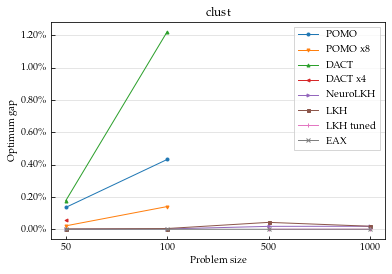

In [63]:
plt.close("all")
fig, ax = plt.subplots()
ax.plot([0, 1], [e.mean() for e in line_data_pomo], label="POMO", marker='.', linewidth=1)
ax.plot([0, 1], [e.mean() for e in line_data_pomox8], label="POMO x8", marker='v', linewidth=1, markersize=3)
ax.plot([0, 1], [e.mean() for e in line_data_dact], label="DACT", marker='^', linewidth=1, markersize=3)
ax.plot([0], [e.mean() for e in line_data_dactx4], label="DACT x4", marker='<', linewidth=1, markersize=3)
ax.plot([0, 1, 2, 3], [e.mean() for e in line_data_nlkh], label="NeuroLKH", marker='>', linewidth=1, markersize=3)
ax.plot([0, 1, 2, 3], [e.mean() for e in line_data_lkh], label="LKH", marker='s', linewidth=1, markersize=3)
ax.plot([2, 3], [e.mean() for e in line_data_lkh_tuned], label="LKH tuned", marker='+', linewidth=1, markersize=4)
ax.plot([0, 1, 2, 3], [e.mean() for e in line_data_eax], label="EAX", marker='x', linewidth=1, markersize=4)

ax.set_xticks(range(4))
ax.set_xticklabels(map(str, [50, 100, 500, 1000]))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.grid(axis="y", alpha=0.4)
ax.set_title("clust")
ax.set_xlabel("Problem size")
ax.set_ylabel("Optimum gap")
plt.legend()
fig.savefig("test3-clust.pdf", dpi=200)

In [39]:
line_data_dact

[array([0.        , 0.        , 0.        , ..., 0.00024572, 0.        ,
        0.        ]),
 array([0.00921781, 0.00846493, 0.01010182, ..., 0.00712484, 0.00515814,
        0.00589845])]

In [41]:
[e.std() for e in line_data_dact]
[e.mean() for e in line_data_dact]

[0.0001665593267518053, 0.006596367197537548]